# Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from sklearn.linear_model import LinearRegression

import os
import typing

style.use("fivethirtyeight")

## Non-Random Data

In [2]:
wage_path = './wage.csv'
wage_url = 'https://raw.githubusercontent.com/matheusfacure/python-causality-handbook/refs/heads/master/causal-inference-for-the-brave-and-true/data/wage.csv'
if os.path.exists(wage_path):
    data = pd.read_csv(wage_path)
else:
    data = pd.read_csv(wage_url)
    data.to_csv(wage_path)

data.head()

,Unnamed: 0,wage,hours,lhwage,IQ,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc
0,0,769,40,2.956212,93,12,11,2,31,1,0,0,1,1,2.0,8.0,8.0
1,1,808,50,2.782539,119,18,11,16,37,1,0,0,1,1,NaN,14.0,14.0
2,2,825,40,3.026504,108,14,11,9,33,1,0,0,1,1,2.0,14.0,14.0
3,3,650,40,2.788093,96,12,13,7,32,1,0,0,1,4,3.0,12.0,12.0
4,4,562,40,2.642622,74,11,14,5,34,1,0,0,1,10,6.0,6.0,11.0


<Axes: xlabel='IQ', ylabel='lhwage'>

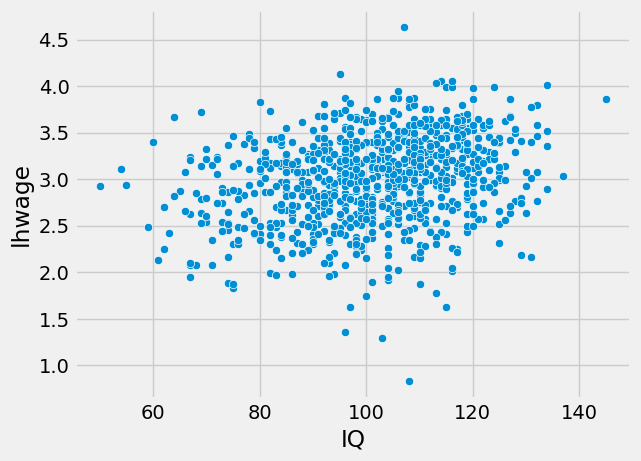

In [3]:
sns.scatterplot(data, x='IQ', y='lhwage')

In [4]:
len(data)

935

In [5]:
data.fillna(0.0, inplace=True)

(np.float64(0.10189297832176304), np.float64(0.2635605689892693))

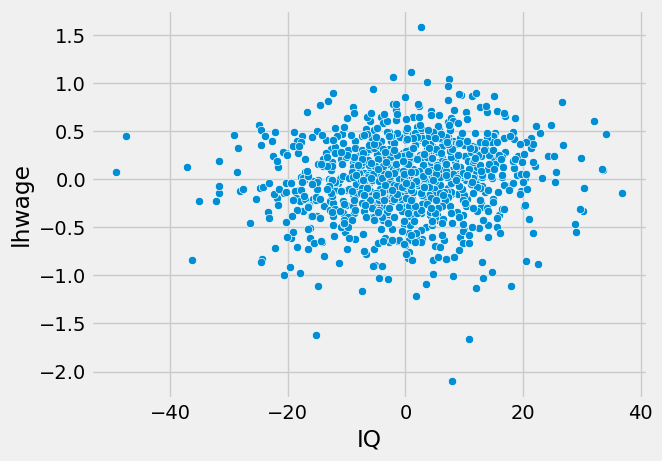

In [6]:
covariates = ['educ', 'exper', 'tenure', 'age', 'married', 'black', 'south', 'urban', 'sibs', 'brthord', 'meduc', 'feduc']
model_iq = LinearRegression().fit(data[covariates], data.IQ)
model_wage = LinearRegression().fit(data[covariates], data.lhwage)

wage_res = data.lhwage - model_wage.predict(data[covariates])
iq_res = data.IQ - model_iq.predict(data[covariates])

sns.scatterplot(x=iq_res, y=wage_res)
wage_res.corr(iq_res), data.lhwage.corr(data.IQ)

Text(0.5, 1.0, 'Causal model $\\beta_1 = 0.041$')

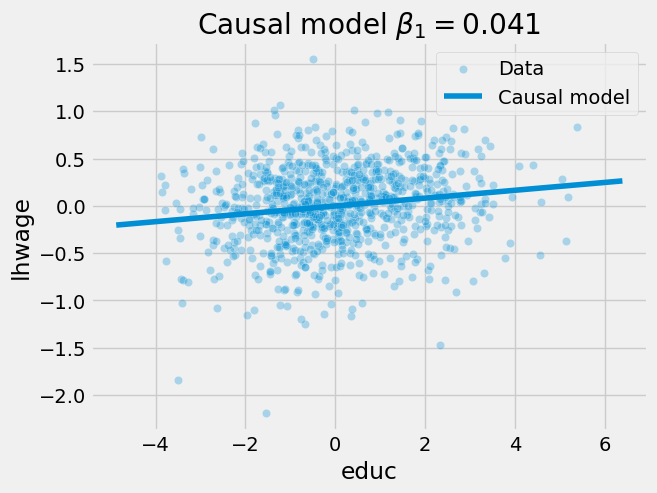

In [7]:
covariates = ['exper', 'tenure', 'age', 'married', 'black', 'south', 'urban', 'sibs', 'brthord', 'IQ', 'meduc', 'feduc']
model_educ = LinearRegression().fit(data[covariates], data.educ)
model_wage = LinearRegression().fit(data[covariates], data.lhwage)

wage_res = data.lhwage - model_wage.predict(data[covariates])
educ_res = data.educ - model_educ.predict(data[covariates])

sns.scatterplot(x=educ_res, y=wage_res, label="Data", alpha=0.3)

model_causal = LinearRegression().fit(pd.DataFrame({"educ":educ_res}), wage_res)

x = np.linspace(educ_res.min() - 1, educ_res.max() + 1, 10)
sns.lineplot(x=x, y=model_causal.predict(pd.DataFrame({"educ":x})), label="Causal model")
plt.title(fr'Causal model $\beta_1 = {model_causal.coef_[0]:.3f}$')

### The Very Simple Model

First let's try the very simple model:

$log(HourlyWage_i) = \beta_0 + \beta_1 * educ_i + e_i$

In [8]:
simple_model = LinearRegression().fit(data[['educ']], data.lhwage)
simple_model.intercept_, simple_model.coef_

(np.float64(2.2954231510925514), array([0.05294724]))

Text(0, 0.5, '$log(wage)$')

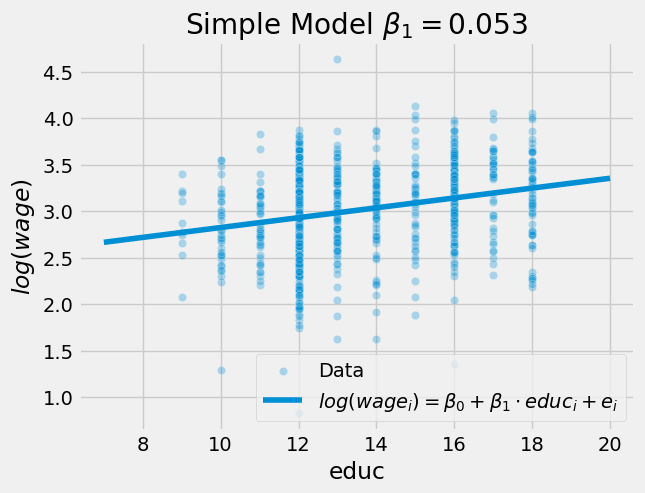

In [9]:
sns.scatterplot(x=data.educ, y=data.lhwage, label="Data", alpha=0.3)

x = np.linspace(data.educ.min()-2, data.educ.max()+2, 20)
sns.lineplot(x=x, y=simple_model.predict(pd.DataFrame({"educ": x})), label=r"$log(wage_i) = \beta_0 + \beta_1 \cdot educ_i + e_i$")

plt.title(fr'Simple Model $\beta_1 = {simple_model.coef_[0]:.3f}$')
plt.ylabel("$log(wage)$")